In [207]:
import  os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data

In [208]:
dm = {
    "m1": "2023-12-06-03-21-11",
    "m2": "2023-12-06-03-23-06",
    "m4": "2023-12-06-03-24-02",
    "m8": "2023-12-06-03-24-12",
    "m16": "2023-12-06-03-26-10",
    "m32": "2023-12-06-03-26-20",
    "m64": "2023-12-06-03-26-29",
}
# modelName = "m1"
# modelName = "m2"
# modelName = "m4"
# modelName = "m8"
# modelName = "m16"
# modelName = "m32"
modelName = "m64"

folderName= dm[modelName]

In [209]:
cwd = sys.path[0]
folderPath = os.path.join(cwd, "o4_analyze", folderName)
data_pickle, data_json = read_data(folderPath)

X_pred = data_pickle['X_pred']
X_true = data_pickle['X_true']
tArrayPred = data_pickle['tArrayPred']
L2Array = data_pickle["L2Array"]
dx = data_json['s1']['dx']
L = data_json['s1']["L"]
L2 = data_json['s4']["L2"]

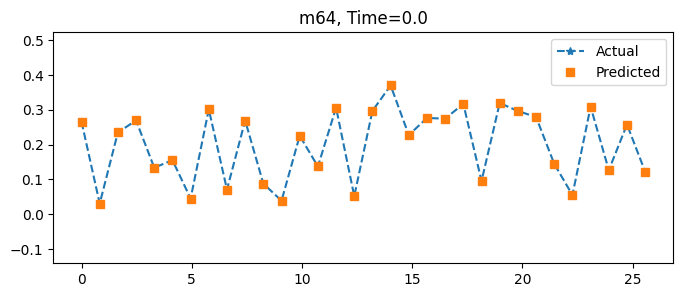

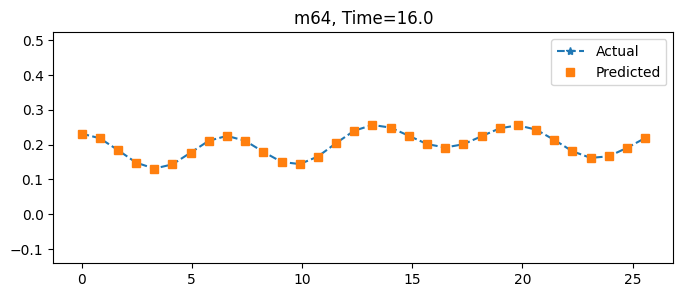

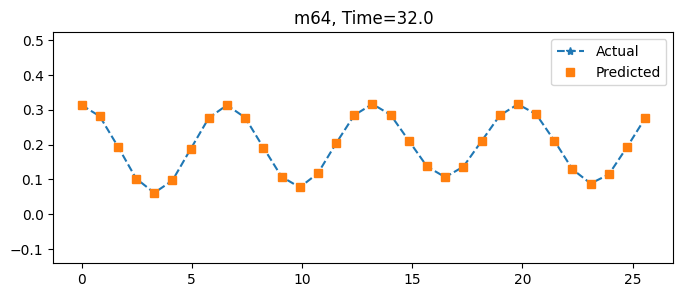

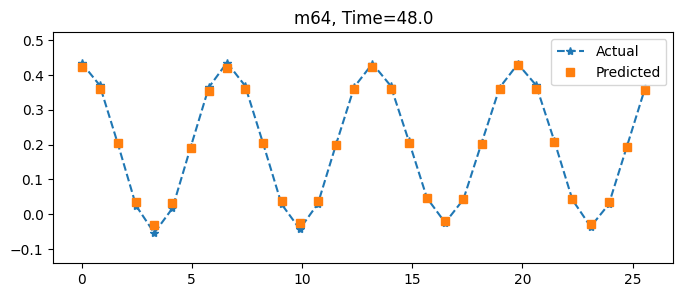

In [210]:
filenamePrefix = 'profile'
minV = X_true[-1,:].min()
maxV = X_true[-1,:].max()
minV = minV - abs(maxV) * 0.2
maxV = maxV + abs(maxV) * 0.2
xp = np.arange(0,L,dx)

nFig = 4
idxTSample = np.floor(np.linspace(0,tArrayPred.shape[0]-1, nFig)).astype(int)
for t in idxTSample:
    tTime = tArrayPred[t]
    fig, ax = plt.subplots(figsize=(8,3))
    ax.plot(xp, X_true[t,:], '*--', label='Actual')
    ax.plot(xp, X_pred[t,:],'s', label='Predicted')
    ax.set_title(f'{modelName}, Time={tTime}')
    ax.set_ylim([minV,maxV])
    plt.legend()
    tTimeFmt = f'{tTime:2.1f}'.replace(".","_")
    filename = f'{filenamePrefix}-{modelName}-t{tTimeFmt}.png'
    filePath = os.path.join(os.getcwd(), 'o5_visualize', filename)
    filepath = os.path.join(os.getcwd(), "o5_visualize", filename)
    plt.savefig(filepath, dpi=300, bbox_inches="tight")


Text(0.5, 0, 'Time')

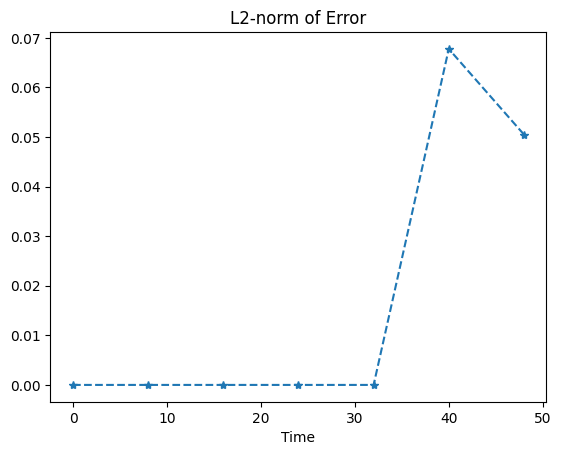

In [211]:
fig, ax = plt.subplots()
ax.plot(tArrayPred, L2Array,'--*')
ax.set_title(r'L2-norm of Error')
ax.set_xlabel('Time')